In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

Geometric Brownian Motion $dS_t = \mu S_t dt + \sigma S_t dW_t$

In [33]:
def gbm(s0, mu,sigma,T,n,M):
    #M : no of sim, n: no of steps
    dt = T/n
    st = np.exp((mu-sigma**2/2)*dt + sigma* np.random.normal(0, np.sqrt(dt), size = (M,n)).T)
    st = np.vstack([np.ones(M),st]) #arrays of 1s
    st = s0 * st.cumprod(axis=0) 
    #multipling by S0 and returning the cumulative product of elements along a given simulation path (axis=0)
    #Define time interval correctly 
    time = np.linspace(0,T,n+1) 
    tt = np.full(shape=(M,n+1), fill_value=time).T #creating a numpy array that is the same shape as St
    return tt, st
    


In [34]:
# Parameters
# drift coefficent
mu = 0.1
# number of steps
n = 100
# time in years
T = 1
# number of sims
M = 100
# initial stock price
s0 = 100
# volatility
sigma = 0.3
tt,st = gbm(s0,mu,sigma,T,n,M)

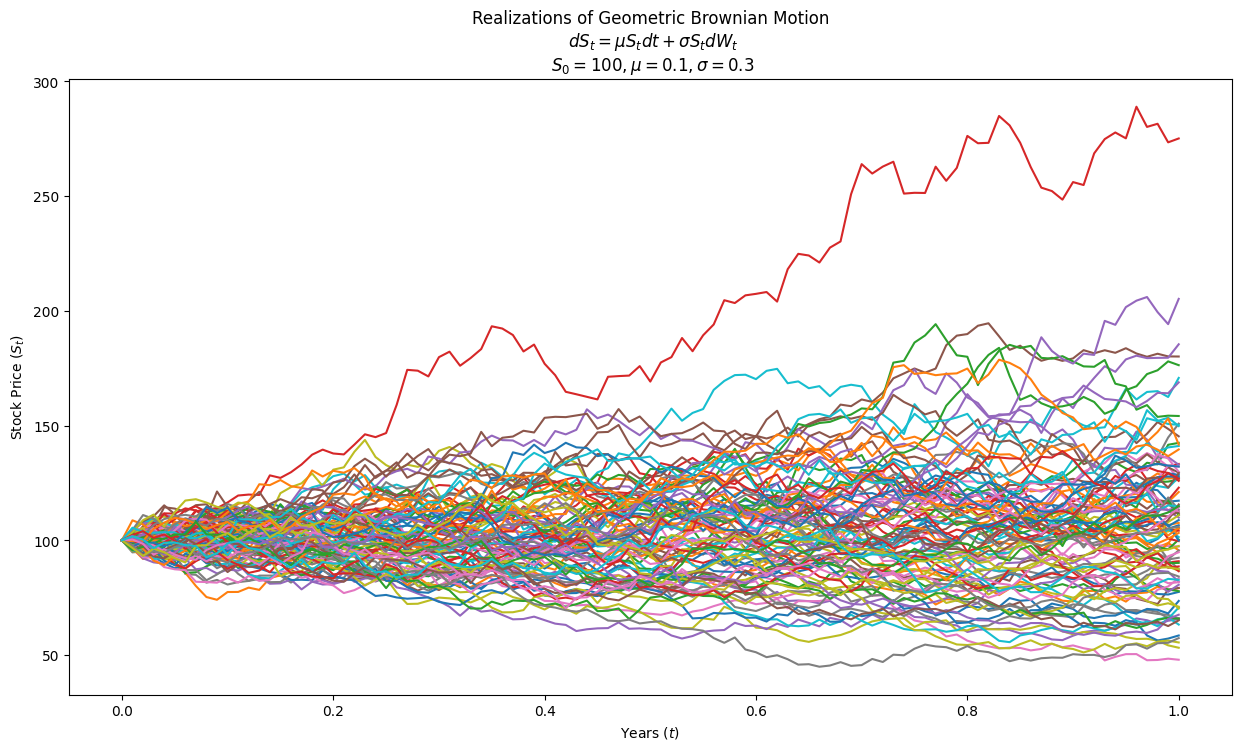

In [23]:
plt.figure(figsize=(15,8))
plt.plot(tt, st)
plt.xlabel("Years $(t)$")
plt.ylabel("Stock Price $(S_t)$")
plt.title(
    "Geometric Brownian Motion\n $dS_t = \mu S_t dt + \sigma S_t dW_t$"
)
plt.show()

option pricing

In [25]:
K = 110
payoffs = np.maximum(st[-1]-K,0)
option_price = np.mean(payoffs)*np.exp(-sigma *T)
print(f"Simulated price is {option_price}")

Simulated price is 9.547065294451713
